<a href="https://colab.research.google.com/github/AlvaroMorenoJimenez/CM2324/blob/main/SistemaDeRecoleccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREÁMBULO (Importante ejecutar su código)

<p align="justify">
Este será el apartado donde vamos a incluir todos los códigos visto en clase y que vamos a emplear, de forma que los tengamos precargados en el cuaderno y podamos usarlos en celdas posteriores sin necesidad de vovler a crearlos.


## Bibliotecas


In [1]:
# Imclusión de bibliotecas necesarias

import matplotlib.pyplot as plt
import numpy as np


## Clase EnumeratedFS()


In [2]:
class EnumeratedFS():
    """ Clase para modelar un conjunto difuso de forma discreta

        Modela un conjunto difuso a través de un conjunto de valores discretos
        mediante un para x_values, y_values.

        Attributes:
                x_valores (list[float]): valor del que se tiene la pertenencia.
                y_valores (list[float]): valor de pertenencia.
                func_pert (Callable): función que calcula la pertenencia de los valores.
    """
    def __init__(self, name:str, x_values: tuple[float], y_values:tuple[float]):
        self.name = name
        self.x_values = x_values
        self.y_values = y_values


    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre del EnumeratedFS.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_x_values(self) -> tuple:
        """Devuelve los valores de X del MembershipFS.

        Args:
            None

        Returns:
            tuple of a indeterminate number of floats.
        """
        return self.x_values


    def get_y_values(self) -> tuple:
        """Devuelve los valores de Y de MembershipFS.

        Args:
            None

        Returns:
            tuple of a indeterminate number of floats.
        """
        return self.y_values

    # FUNCIONES PROPIAS
    def genera_grafica(self, legend_label:str='', graphic_show:bool=True,
                    centroid_show:bool=True) -> None:
        """Devuelve la gráfica del EnumeratedFS.

        Args:
            legend_label(str): la leyenda a mostrar
            graphic_show(bool): si se muestra la gráfica
            centroid_show(bool): en caso de mostrar la gráfica si se desea mostrar
                la ubicación del centroide

        Returns:
            None.
        """
        line, = plt.plot(self.get_x_values(), self.get_y_values())
        x_line2d = [line]
        list_legends = []
        if legend_label!= '':
            list_legends = [legend_label]
        else:
            list_legends = [self.get_name()]
        if centroid_show:
            cent = self.centroide()
            line, = plt.plot([cent,cent],[0,1])
            x_line2d.append(line)
            list_legends.append( 'defuzz val = ' + str( round(cent,2) ) )
        # Coloca los valores del eje Y y leyendas
        plt.yticks(np.arange(0,1.1,0.1))
        plt.legend(x_line2d, list_legends, loc='best')
        # Muestra la gráfica
        if graphic_show:
            plt.show()

    def centroide(self) -> float:
        """Devuelve el centroide de este EnuemratedFS.

        Args:
            None

        Returns:
            float.
        """
        nume = sum( [a*b for a,b in zip(self.get_x_values(),self.get_y_values())] )
        deno = sum(self.get_y_values())
        return nume/deno


## Función enumerated_fs_union()


In [3]:
# función que una varios conjuntos enumerados en uno
def enumerated_fs_union(enumerated_sets:list, name:str) -> EnumeratedFS:
    """Devuelve un EnumeratedFS que es la unión/agregación de todos los
        EnumeratedFS en ctosEnuemr.

    Args:
        EnumeratedSets(list)
        name(str)

    Returns:
        EnumeratedFS.
    """
    x_union = []
    y_union = []
    for cto in enumerated_sets:
        comp_x, comp_y = cto.get_x_values(), cto.get_y_values()
        if not y_union: # Equivalente a "y_union==[]"
            x_union = comp_x
            y_union = comp_y
        else:
            x_union = comp_x
            y_union = [ max(e,e1) for e,e1 in zip(y_union,comp_y) ]
    return EnumeratedFS(name, x_union, y_union)


## Funciones triangular() y trapezoidal()


In [4]:
# Funciones triangular y trapezoidal

def triangular(in_val, values:tuple) -> float:
    """ Función que calcula una función de pertenencia triangular

        Args:
                in_val (float): El valor float para calcular su pertenencia.
                values (tuple): 3 valores float que definen la función de pertenencia

        Returns:
                float: valor de pertenencia de val al conjunto representado por valores.
    """
    if in_val<values[0]:
        return 0.0
    if in_val>=values[0] and in_val<=values[1]:
        if values[0]==values[1]:
            return 1.0
        return (in_val-values[0])/(values[1]-values[0])
    if in_val>values[1] and in_val<=values[2]:
        return (values[2]-in_val)/(values[2]-values[1])
    if in_val>values[2]:
        return 0.0

def trapezoidal(in_val, values:tuple) -> float:
    """ Función que calcula una función de pertenencia trapezoidal

        Args:
                in_val (float): El valor float para calcular su pertenencia.
                values (tuple): 4 valores float que definen la función de pertenencia

        Returns:
                float: valor de pertenencia de val al conjunto representado por valores.
    """
    if in_val<values[0]:
        return 0.0
    if in_val>=values[0] and in_val<values[1]:
        return (in_val-values[0])/(values[1]-values[0])
    if in_val>=values[1] and in_val<=values[2]:
        return 1
    if in_val>=values[2] and in_val<=values[3]:
        return (values[3]-in_val)/(values[3]-values[2])
    if in_val>values[3]:
        return 0


## Clase FuzzySet()


In [5]:
""" Clase para manejar los terminos, especialmente en DocString"""
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np

################################
# COMIENZA LA CLASE FuzzySet IMPORTANTE: ANTES -> MembershipFS
################################

class FuzzySet():
    """ Clase para modelar una conjunto difuso

        Esta clase modela un conjunto difuso con cualquier tipo de función de
        pertenencia. Se debe pasar la función de pertenencia en la creación
        del objeto

        Attributes:
                nombre (str): str que contiene el nombre del conjunto.
                valores (tuple[float]): tuple de floats que definen el conjunto difuso.
                func_pert (Callable): función que calcula la pertenencia de los valores.
    """
    def __init__(self, name:str, function: Callable[[tuple],float], values:tuple):
        self.name = name
        self.values = values
        self.function = function


    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre del MembershipFS.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_values(self) -> tuple[float]:
        """Devuelve los valores del MembershipFS.

        Args:
            None

        Returns:
            tuple of a indeterminate number of floats.
        """
        return self.values


    def get_membership(self) -> Callable:
        """Devuelve la función python utilizada como función de pertenencia.

        Args:
            None

        Returns:
            Callable.
        """
        return self.function


    #SETTERS
    def set_name(self, name:str) -> None:
        """Asigna el nombre del MembershipFS.

        Args:
            name: str.

        Returns:
            None.
        """
        self.name = name


    def set_values(self, values:tuple[float]) -> None:
        """Asigna los valores a utilizar por la función de pertenencia.

        Args:
            values: tuple of an indeterminate number of float.

        Returns:
            None.
        """
        self.values = values

    def set_func_pert(self, m_function:Callable[[tuple],float]) -> None:
        """Asigna la función python a utilizar como función de pertenencia.

        Args:
            m_function: función a utilizar, debe utilizar como parámetros
            una tupla de float y un valor float.

        Returns:
            None.
        """
        self.function = m_function

    # MÉTODOS PROPIOS
    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

         Args:
            None

        Returns:
                str.
        """
        return str(self.name) + ': ' + str(self.values)


    def membership_grade(self, in_val:float) -> float:
        """Calcula la pertenencia de in_val al conjunto difuso que modela esta clase
        según la función en self.function.

        Args:
                in_val (float): El valor float para calcular su pertenencia.

        Returns:
                float.
        """
        return self.function( in_val, self.values )


## Clase Variable()

In [6]:
""" Clase padre de todos los tipos de variables"""
#from files.terms import MembershipFS

class Variable():
    """ Clase para modelar una variable de cualquier tipo. Es la clase padre
    de todas.

        Tendrá las componentes nombre.

        Attributes:
            name (str): str que contiene el nombre de la variable.
            support (tuple[float]): lista de 2 float que definen el dominio de la
            variable como un valor inferior del dominio y el superior como un
            intervalo cerrado.
            term (float): valor real del término.
    """
    def __init__(self, name:str, position: int):
        self.name = name
        self.position = position


    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre de la variable lingüística.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_position(self) -> float:
        """ Devuelve la posicion en el lugar de entrada de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.position

    # FUNCIONES PROPIAS
    def __str__(self) -> str:
        """Devuelve lesta clase como str.

        Args:
            None

        Returns:
            str.
        """
        return str(self.name) + '\n'


## Clase LinguisticV()

In [7]:
class LinguisticV(Variable):
    """ Clase para modelar una variable lingüística

        Esta clase modela una variable lingüística reducida. No modela los 5 campos
        de la definición, pero sí es funcional para los problemas a tratar.

        Attributes:
            nombre (str): str que contiene el nombre de la variable.
            dominio (tuple[float]): lista de 2 float que definen el dominio de la
            variable como un valor inferior del dominio y el superior como un
            intervalo cerrado.
            CDs (list[CDifuso]): lista con los conjuntos difusos que forman los
            términos primarios.
    """
    def __init__(self, name:str, position: int, support:list[float], values:dict):
        Variable.__init__(self,name, position)
        self.support = support
        self.values = values


    # GETTERS
    def get_lower_support(self) -> float:
        """Devuelve el mínimo valor del dominio de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.support[0]

    def get_upper_support(self) -> float:
        """ Devuelve el máximo valor del dominio de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.support[1]


    def get_values(self) -> float:
        """Devuelve el termino primario de nombre "name".

        Args:
            None.

        Returns:
            float.
        """
        return self.values

    def get_fuzzy_set(self, name:str) -> FuzzySet:
        """Devuelve el termino primario de nombre "name".

        Args:
            name (str): nombre del FS a devolver.

        Returns:
            FuzzySet.
        """
        return self.values[name]

    # FUNCIONES PROPIAS
    def __str__(self) -> str:
        """Devuelve lesta clase como str.

        Args:
            None

        Returns:
            str.
        """
        chain = ''
        for elem in self.values:
            chain += '\n' + str(elem)
        return str(self.name) + ' ' + str(self.support) + ' ' + chain + '\n'

## Clase AtomicProposition()

In [8]:
class AtomicProposition():
    """ Clase para modelar una proposición atómica

        Esta clase modela las proposiciones atómicas, por ejemplo:
        V es T

        Attributes:
            antecedent(LinguisticV): Variable Lingüística de la PDA.
            CL (CL): término primario de la PDA.
    """
    def __init__(self, variable:Variable, term:FuzzySet):
        self.variable = variable
        self.term = term

    # GETTERS
    def get_variable(self) -> Variable:
        """Devuelve la variable.

        Args:
            None

        Returns:
            Variable.
        """
        return self.variable

    def get_term(self) -> FuzzySet:
        """Devuelve el término primario.

        Args:
            None

        Returns:
            Term.
        """
        return self.term


    # GETTERS
    def set_variable(self, variable:Variable) -> None:
        """Devuelve la variable.

        Args:
            variable (Variable): variable a asignar.

        Returns:
            None
        """
        self.variable = variable

    def set_term(self, term:FuzzySet) -> None:
        """Devuelve el término independiente.

        Args:
            term(MembershipFS): conjunto (término) a asignar.

        Returns:
            None
        """
        self.term = term


## Clase FuzzyAP()


In [9]:
class FuzzyAP(AtomicProposition):
    """ Clase para modelar una proposición difusa

        Esta clase modela las proposiciones difusas atómicas, por ejemplo:
        T es Fría

        Attributes:
            antecedent(LinguisticV): Variable Lingüística de la PDA.
            CL (CL): término primario de la PDA.
    """
    def __init__(self, variable:LinguisticV, term:FuzzySet):
        AtomicProposition.__init__(self, variable, term)


    # FUNCIONES PROPIAS
    def membership_grade(self, value:float) -> float:
        """Devuelve el valor de pertenencia de "value" al termino primario
        (conjunto difuso).

        Args:
            value(float): valor a calcular su pertenencia.

        Returns:
            float: valor de pertenencia
        """
        return self.get_term().membership_grade(value)


    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

        Args:
            None.

        Returns:
            str.
        """
        return str(self.get_variable().get_name()) + ' es ' + str(self.get_term().get_name())


## Clase PDC()


In [10]:
class PDC():
    """ Clase para modelar una proposición compuesta.

    Se modela con dos listas: (1) la primera tiene como componentes objetos AP
    y/o CP, (2) La segunda tiene conectivas implementadas como funciones (Callable)

        Attributes:
            proposiciones (list): Lista con las proposiciones que componen la PDC.
            conectivas (list[Callable]): conectivas entre las PDAs que componen el
            atributo "proposiciones". Tendrá una longitud un elemento inferior al
            atributo "proposiciones".
    """
    def __init__(self, propos:list, functions:dict ):
        # Creación de las proposiciones a partir de "propos"
        self.proposiciones = []
        # Creación de las conectivas a partir de "propos" y funciones
        self.conectivas_texto = []
        self.conectivas_funcion = []
        # Creación de las proposiciones a partir de "propos"
        self.proposiciones = []
        for fuz_propo in propos[0::2]:
            if len(fuz_propo)>2:
                self.proposiciones.append( PDC(fuz_propo, functions) )
            else:
                if fuz_propo[0]['type']=='fuzzy':
                    self.proposiciones.append( FuzzyAP( # Crea PDA
                        LinguisticV(fuz_propo[0]['name'],
                                    fuz_propo[0]['position'],
                                    fuz_propo[0]['support'],
                                    fuz_propo[0]['sets']), # Primer parámetro un VL
                        fuz_propo[0]['sets'][fuz_propo[1]] )  # Segundo parámetro un CD
                    )
        # Creación de las conectivas a partir de "propos" y funciones
        self.conectivas_texto = [ conec for conec in propos[1::2] ]
        self.conectivas_funcion = [ functions[conec] for conec in propos[1::2] ]


    # GETTERS
    def get_proposicion(self, pos:int) -> AtomicProposition:
        """Devuelve la variable de la proposición.

        Args:
            pos(int): posición de la proposición a recuperar.

        Returns:
            PDA.
        """
        return self.proposiciones[pos]

    def get_num_proposiciones(self) -> int:
        """Devuelve el número de proposiciones.

        Args:
            None

        Returns:
            int.
        """
        return len(self.proposiciones)

    def get_conectiva_texto(self, pos:int) -> str:
        """Devuelve la t_norma/t_conorma como texto entre las proposiciones difusas
        en las posiciones pos-1 y pos+1.

        Args:
            pos(int): posición de la conectiva a devolver

        Returns:
            str.
        """
        return self.conectivas_texto[pos]

    def get_conectiva_funcion(self, pos:int) -> Callable:
        """Devuelve el t_norma/t_conorma a utilizar entre las proposiciones difusas
        en las posiciones pos-1 y pos+1.

        Args:
            pos(int): posición de la función a devolver

        Returns:
            Callable.
        """
        return self.conectivas_funcion[pos]
    def membership_grade(self, valores:list[float]) -> float:
        """Devuelve el grado de pertenencia del PDC.

        Args:
            valores(list[float]): los valores que se pasarán a cada una de las proposiciones

        Returns:
            float.
        """
        result = []
        for propo in self.proposiciones:
            if str(type(propo))[-5:-2]=='PDC':
                pos = propo.get_proposicion(0).get_variable().get_position()
                #val = [valores[pos]]*propo.get_num_proposiciones()
                result.append( propo.membership_grade(valores) )
                #print('ENTRO EN PDC:',pos,propo.get_variable().get_name())
            else:
                pos = propo.get_variable().get_position()
                result.append( propo.membership_grade(valores[pos]) )
        res = result[0]
        for r,conec in zip(result[1:],self.conectivas_funcion):
            res = conec(res,r)
        return res

    def __str__(self) -> str:
        """Devuelve la clase como cadena.

        Args:
            None

        Returns:
            str.
        """
        cad = ''
        for pos,elem in enumerate(self.proposiciones):
            try:
                cad += ' (' + str(elem) + ') ' + self.conectivas_texto[pos]
            except IndexError:
                cad += ' (' + str(elem) + ') '
        return cad



## Funciones conectivas AND, OR, NOT

In [11]:
# Definición de t_normas y t_conormas a usar
def and_t_norma(val1:float, val2:float):
    """
    T-norma del producto
    """
    return min(val1,val2)

def or_t_conorma(val1:float, val2:float):
    """
    T-conorma de la suma
    """
    return max(val1,val2)

def not_operator(val1:float):
    """
    Operador not
    """
    return 1-val1

# Las incluímos en el conjunto funciones()
funciones = {
    'AND': and_t_norma,
    'OR': or_t_conorma,
    'NOT': not_operator
}


## Clase RD()


In [12]:
class RD():
    """ Clase para modelar una regla difusa.

    Se modela con dos componentes de tipo PDC (antecedente) y de tipo
    PDA (consecuente)

        Attributes:
            antecedente (PDC): proposición difusa compuesta que representa el
            antecedente.
            consecuente (list[Callable]): proposición difusa compuesta que representa
            el consecuente.
    """
    def __init__(self, name:str, antecedent:PDC):
        self.name = name
        self.antecedent = antecedent

    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre de la regla.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_antecedent(self) -> PDC:
        """Devuelve el antecedente.

        Args:
            None

        Returns:
            PDC.
        """
        return self.antecedent


## Clase MandaniRule()


In [13]:
class MandaniRule(RD):
    """ Clase para modelar una regla difusa tipo Mandani.

    Se modela con dos componentes de tipo PDC (antecedente) y de tipo
    PDA (consecuente)

        Attributes:
            antecedente (PDC): proposición difusa compuesta que representa el
            antecedente.
            consecuente (list[Callable]): proposición difusa compuesta que representa
            el consecuente.
    """
    def __init__(self, name:str, antecedent:PDC, consequent:FuzzyAP):
        RD.__init__(self, name, antecedent)
        self.consequent = consequent


    def get_consequent(self) -> FuzzyAP:
        """Devuelve el consecuente.

        Args:
            None

        Returns:
            FuzzyAP.
        """
        return self.consequent


    def membership_grade(self, values:list[float]) -> EnumeratedFS:
        """Devuelve la pertenencia a la regla, es decir, utiliza A y B, para resolver
        A=>B, con el operador de implicación de Mandani:
                mu_R(x,y)=min(mu_A(X),mu_B(y)).

        Attributes:
            valores (list[float]): lista de valores para cada proposición

        Returns:
            EnumeratedFS.
        """
        mu_antecedent = self.get_antecedent().membership_grade(values)
        if mu_antecedent>0.0:
            mini = self.get_consequent().get_variable().get_lower_support()
            maxi = self.get_consequent().get_variable().get_upper_support()
            output_grades = [ (round(val,2),min(mu_antecedent,self.get_consequent().get_term().membership_grade(val))) for val in np.arange(mini,maxi,1,) ]
            x_values, y_values = zip(*output_grades)
            return EnumeratedFS('Out ' + self.get_name(), x_values, y_values)
        else:
            return EnumeratedFS('Out ', [], []) # PASAR A CDEnumerado VACÍO


    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

        Args:
            None

        Returns:
            str.
        """
        return 'IF' + str(self.get_antecedent()) + 'THEN ' + str(self.get_consequent())


## Clase FuzzyModel()


In [14]:
class FuzzyModel():
    """ Clase para modelar un modelo difuso (sistema de control).

    Se modela con una lista que contiene objetos de tipo RD

        Attributes:
            RDs (list[RDs]): lista con las reglas modeladas con objetos de tipo RD.
    """
    def __init__(self, rules:list[RD] ):
        self.rules = rules

    # GETTERS
    def get_rule(self, pos:int) -> RD:
        """Devuelve la regla en la posición pos.

        Args:
            pos(int): posición de la regla a recuperar.

        Returns:
            RD.
        """
        return self.rules[pos]


    def get_rules(self) -> list[RD]:
        """Devuelve la lista que contiene las reglas de todo el modelo.

        Returns:
            list[RD]
        """
        return self.rules


    # SETTERS
    def set_rules(self, regla:RD, pos:int) -> None:
        """Cambia la regla en la posición "pos".

        Args:
            regla (RD): nueva regla a colocar en "pos"
            pos (int): posición que se cambia la regla.

        Returns:
            None
        """
        self.rules[pos] = regla


    # FUNCIONES PROPIAS
    def add_rule(self, rule:RD) -> None:
        """Añade la regla pasada como parámetro al modelo.

        Args:
            regla (RD): regla a añadir

        Returns:
            None
        """
        self.rules.append(rule)


    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

        Returns:
            str.
        """
        cad = ''
        for regla in self.rules:
            cad += str(regla) + '\n'
        return cad


## Clase MandaniFuzzyModel()


In [15]:
class MandaniFuzzyModel(FuzzyModel):
    """ Clase para modelar un modelo difuso (sistema de control).

    Se modela con una lista que contiene objetos de tipo RD

        Attributes:
            RDs (list[RDs]): lista con las reglas modeladas con objetos de tipo RD.
    """
    def __init__(self, rules:list[MandaniRule] ):
        FuzzyModel.__init__(self, rules)


    def rule_mandani_inference(self, inputs:list[list[float]],
                                 set_name:str='Union') -> tuple[EnumeratedFS,list[float]]:
        """Realiza la inferencia tipo Mandani para una regla.

        Args:
            input (list[list[float]]): estructura de lista que contienen los valores de entrada
                para realizar los cálculos
            set_name (str): nombre del conjunto difuso obtenido

        Returns:
            tuple[EnumeratedFS,list[float]]
        """
        enumerated_fs_list = [] # contendrá los CDEnumerados resultados de las reglas
        for rule in self.get_rules():
            # Calcular la pertenencia a la regla actual
            enumerated_output_set = rule.membership_grade(inputs)
            if enumerated_output_set.get_x_values()!=[]: # la añade al modelo si no es vacía
                enumerated_fs_list.append( enumerated_output_set )
        # Se realiza la unión de las salidas de las reglas en el CDEnumerado union
        # obteniendo un conjunto enumerado (primer valor devuelto) y los conjuntos
        # enumerados obtenidos como salida de cada regla
        return enumerated_fs_union(enumerated_fs_list, set_name), enumerated_fs_list


    def model_mandani_inference(self, in_values:list[list]) -> list[dict]:
        """Realiza la inferencia tipo Mandani.

        Args:
            in_values (list[list]): lista que contiene una lista para cada
                entrada a testear

        Returns:
            tuple(EnumeratedFS,list[float]
        """
        to_return = []
        for value in in_values:
            enumerated_fuzzy_set, enumerated_fs_list = self.rule_mandani_inference(value)
            to_return.append( {'Input': value,
                    'FSEnumeratedUnion': enumerated_fuzzy_set,
                    'actives_rules': [elem.get_name()[-2:] for elem in enumerated_fs_list],
                    'EnumeratedFS': enumerated_fs_list})
        return to_return


## Funciones gráficas necesarias


In [16]:
def dibuja_cto_enumerado(x, y, eti_leyenda:str):
    b, = plt.plot(x,y)
    # Coloca los valores del eje Y y leyendas
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend([b], [eti_leyenda], loc='best')
    # Muestra la gráfica
    plt.show()

def dibuja_varios_CDEnumerado(ctosEnumerados:list,
                              ctoUnion:EnumeratedFS=None,
                              mostrarUnion:bool=True, enOtraGrafica:bool=False,
                              muestraCentroide:bool=False):
    l = []
    leyendas = []
    for cto in ctosEnumerados:
        x, y = cto.get_x_values(), cto.get_y_values()
        b, = plt.plot(x, y)
        l.append(b)
        leyendas.append( cto.get_name() )
        # Coloca los valores del eje Y y leyendas
    if mostrarUnion and not enOtraGrafica and ctoUnion!=None:
        b, = plt.plot(ctoUnion.get_x_values(),ctoUnion.get_y_values())
        l.append(b)
        leyendas.append(ctoUnion.get_name())
        if muestraCentroide:
            ctoUnion.genera_grafica(graphic_show=False, centroid_show=muestraCentroide)
    plt.legend(l, leyendas, loc='best')
    plt.yticks(np.arange(0,1.1,0.1))
    # Muestra la gráfica
    plt.show()
    if mostrarUnion and enOtraGrafica:
        ctoUnion.genera_grafica(centroid_show=muestraCentroide)
        #dibuja_cto_enumerado(ctoUnion.get_x_valores(),ctoUnion.get_y_valores(), 'Union')

# 1. Introducción

<p align="justify">
Nuestro caso a controlar, será la regulación de la posición de una válvula de salida de un recolector de agua de lluvia, de forma que descargue para evitar que el depósito rebose. De esta forma, nos guiaremos a partir de la entrada de agua al depósito junto con el nivel de depósito, cuyo comportamiento indicaremos a continuación.

<p align="justify">
El objetivo será que el indicador de nivel nunca sobrepase el nivel de lleno, de forma que vaya regulando la posición de la válvula de salida para evacuar más o menos cantidad, todo ello comparando con la entrada y el nivel actual que se encuentre.

# 2. Entradas difusas

## 2.1 Entrada de agua

<p align="justify">
Partimos de que el depósito posee una entrada de agua a través de una tubería, por la cual cae el agua recolectado de lluvia, de forma que no es una entrada controlada, existiendo un mayor o menor caudal de entrada (también contemplamos que el caudal sea nulo). Consideramos que es una lectura contínua, de forma que aunque no haya lluvia, nos arroje el resultado de que entra 0%.

<p align="justify">
Para modelar dicha entrada al sistema, se han desarrollado las siguientes etiquetas, de forma que el conjunto difuso nos quedaría de la siguiente manera.

*   Bajo
*   Medio
*   Alto

<p align="justify">
Con respecto a los rangos de cada etiqueta, vendrán dados por la siguiente gráfica.

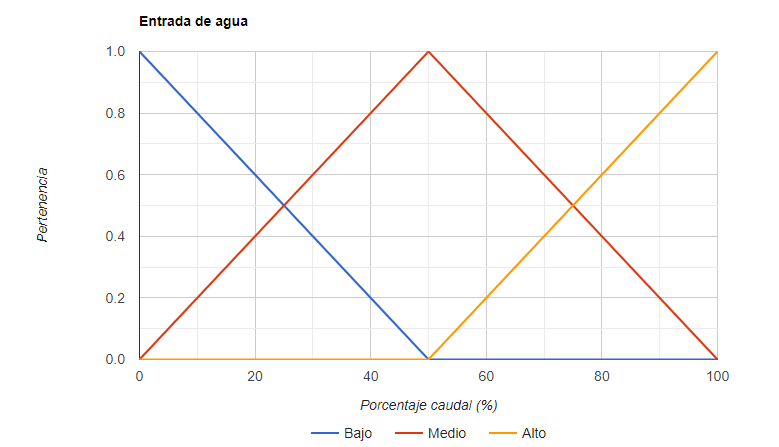



<p align="justify">
En todas las etiquetas hemos empleado la misma lógica, aplicarle un valor de pertenencia 1 al valor principal que hemos considerado y que vaya disminuyendo de igual manera hacia ambos lados. Consideramos como valores de pertenencia principales en cada etiqueta los siguientes: 0 % en el Bajo, 50 % en el Medio y 100 % en el Alto.

### 2.1.1 Código

<p align="justify">
Vamos a programar la varibale difusa Entrada de agua, para lo que empleamos la dinámica llevada a cabo en las clases teóricas. Comenzamos con la creación de un diccionario, donde almacenamos todas las variables necesarias para declararlo como variable lingüñistica (nombre, posición, soporte y fuzzy sets asociados).

In [17]:
# Entrada de agua. Generamos VL a partir de diccionario 'entradaAgua'

entradaAgua = {
    'name': 'Entrada de agua',
    'type': 'fuzzy',
    'position': 0,
    'support': [0, 100],
    'sets': {
        'Bajo': FuzzySet('Bajo', triangular, (0, 0, 50)),
        'Medio': FuzzySet('Medio', triangular, (0, 50, 100)),
        'Alto': FuzzySet('Alto', triangular, (50, 100, 100))
    }
}

entradaAguaVL = LinguisticV(entradaAgua['name'],
                            entradaAgua['position'],
                            entradaAgua['support'],
                            entradaAgua['sets']
                            )

## 2.2 Nivel de agua

<p align="justify">
El nivel de agua, lo modelamos como si tuviésemos un dispositivo capaz de establecer el nivel de líquido, correspondiéndose así con diferentes valores entre 0-10, de forma que se asocie a un depósito de 10 litros y cada nivel sea de 1 litro.

<p align="justify">
Para modelar dicha entrada al sistema, se han desarrollado las siguientes etiquetas, de forma que el conjunto difuso nos quedaría de la siguiente manera.

*   Vacío
*   Semivacío
*   Medio
*   Semilleno
*   Lleno

<p align="justify">
Con respecto a los rangos de cada etiqueta, vendrán dados por la siguiente gráfica.

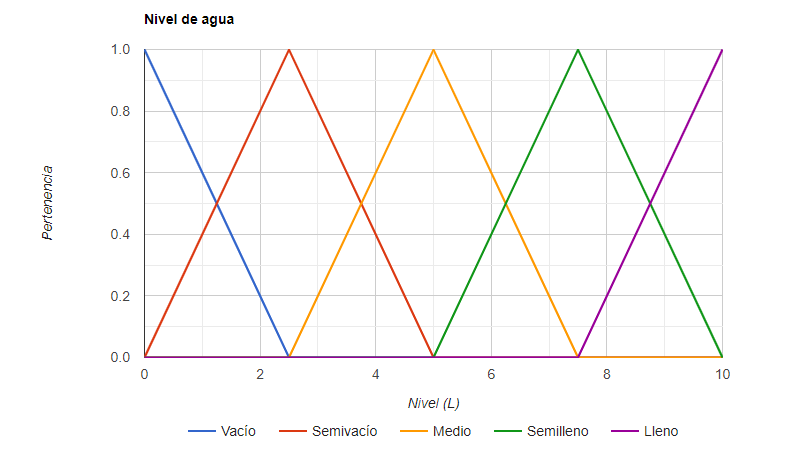



<p align="justify">
Con respecto a cómo hemos pensado cada fuzzy set, establecemos un nivel máximo en cada etiqueta, considerándolo representativo. Los niveles serían de 0 litros para la variable Vacío, de 2.5 para Semivacío, de 5 para Medio, de 7.5 para Semilleno y de 10 para Lleno.


### 2.2.1 Código

<p align="justify">
Vamos a programar la varibale difusa nivel de agua, para lo que empleamos la misma lógica anterior, usando diccionarios.

In [18]:
# Nivel de agua. Generamos VL a partir de diccionario 'nivelAgua'

nivelAgua = {
    'name': 'Nivel de agua',
    'type': 'fuzzy',
    'position': 1,
    'support': [0, 10],
    'sets': {
        'Vacio': FuzzySet('Vacio', triangular, (0, 0, 2.5)),
        'Semivacio': FuzzySet('Semivacio', triangular, (0, 2.5, 5)),
        'Medio': FuzzySet('Medio', triangular, (2.5, 5, 7.5)),
        'Semilleno':FuzzySet('Semilleno', triangular, (5, 7.5, 10)),
        'Lleno':FuzzySet('Lleno',triangular,(7.5, 10, 10))
    }
}

nivelAguaVL = LinguisticV(nivelAgua['name'],
                          nivelAgua['position'],
                          nivelAgua['support'],
                          nivelAgua['sets']
                          )


# 3. Salidas difusas




## 3.1 Posición válvula

<p align="justify">
La salida de nuestro sistema será cómo se posiciona la válvula que controla la salida, de forma que hemos decidido establecer etiquetas para cada posición de esta. Las etiquetas se corresponden con las posiciones de la imagen asociada.

* a (cerrada)
* b (1/2 abierta)
* c (3/4 abierta)
* d (totalmente abierta)

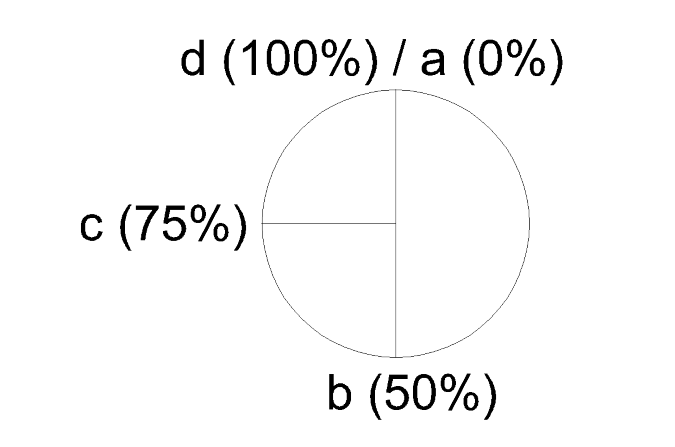

<p align="justify">
Para trasladarlo al control difuso, hemos estbalecido cada fuzzy set de la siguiente manera.

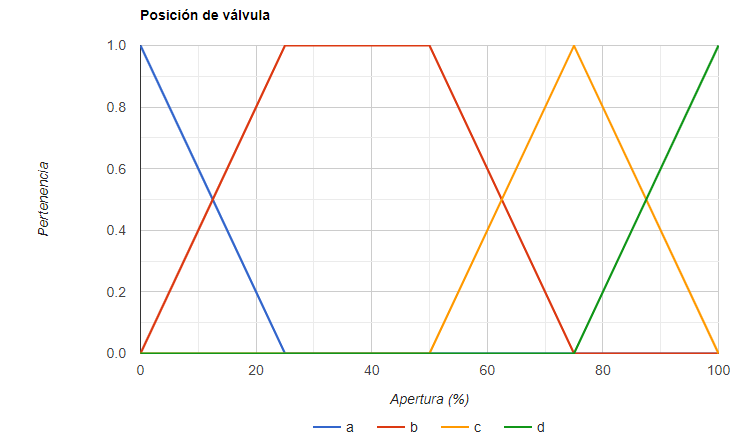


<p align="justify">
Hemos planteado cada etiqueta con la misma dinámica que en las de las entradas, pero con la característica especial de que hemos implementado la salida con un mayor control de cambio en la zona de mayor apertura, que se corresponderá con situaciones de mucho caudal y nivel de agua, de forma que haya más peligro de rebose.

<p align="justify">
Destacar también que en las situaciones en las cuales el riesgo de rebose es sustancialmente inferior y por ello el control empleado es más suave, aplicando un rango más amplio a etiquetas como la de la posición b (forma trapezoidal).


### 3.1.1 Código

<p align="justify">
El código, de nuevo, será implementado por medio de un diccionario que almacene todos los datos necesarios.

In [19]:
valvula = {
    'name': 'Posición válvula',
    'type': 'fuzzy',
    'position': 2,
    'support': [0, 100],
    'sets': {
        'a': FuzzySet('a', triangular, (0, 0, 25)),
        'b': FuzzySet('b', trapezoidal, (0, 25, 50, 75)),
        'c': FuzzySet('c', triangular, (50, 75, 100)),
        'd':FuzzySet('d', triangular, (75, 100, 100))
    }
}

valvulaVL = LinguisticV(valvula['name'],
                        valvula['position'],
                        valvula['support'],
                        valvula['sets']
                            )


 # 4. Reglas difusas

<p align="justify">
 Vamos a proceder a configurar las reglas difusas de nuestro modelo. Las hemos ideado en función de la siguiente tabla, donde mostramos la entrada de agua y el nivel de agua, indicando en cada caso la posición de la válvula a que le asociaríamos.

 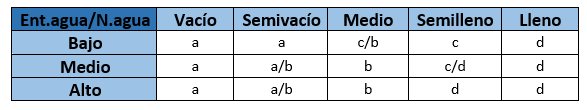

  <p align="justify">
  Hemos configurado la tabla de forma que en los casos de menor caudal y menor nivel, la válvula permanezca cerrada (posición a) en la mayoría de casos o medio abierta (posición b). En los casos de mayor caudal y mayor nivel, la posición que predomina es la de totalmente abierta (posicón d). En lso casos más intermedios, jugaremos con el control en las posiciones b y c.

 <p align="justify">
 Los casos de la tabla coincidirán con las siguientes reglas difusas:

 * R1: IF (nivelAgua es Vacio) OR (nivelAgua es Semivacio) THEN valvula es a
 * R2: IF ((nivelAgua es Medio) AND ((entradaAgua es Bajo) OR (entradaAgua es Medio) OR (entradaAgua es Alto))) THEN valvula es b
 * R3: IF ((nivelAgua es Lleno) AND ((entradaAgua es Bajo) OR (entradaAgua es Medio) OR (entradaAgua es Alto))) THEN valvula es d
 * R4: IF ((entradaAgua es Medio) OR (entradaAgua es Alto)) AND nivelAgua es Semivacio THEN valvula es b
 * R5: IF (entradaAgua es Bajo) AND (nivelAgua es Medio) THEN valvula es c
 * R6: IF ((entradaAgua es Bajo) OR (entradaAgua es Medio)) AND (nivelAgua es Semilleno) THEN valvula es c
 * R7: IF ((entradaAgua es Medio) OR (entradaAgua es Alto)) AND (nivelAgua es Semilleno) THEN valvula es d



## 4.1 Código

 <p align="justify">
 El código que nos modela las reglas difusas será el presentado a continuación.

In [20]:
# R1: IF nivelAguaVL es Vacio OR nivelAguaVL es Semivacio THEN valvulaVL es a
ant1 = [[nivelAgua, 'Vacio'], 'OR', [nivelAgua, 'Semivacio']]
#cons1 = [valvula, 'a']
R1 = MandaniRule(
    'R1',
    PDC(ant1, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('a'))
)


# R2: IF ((nivelAguaVL es Medio) AND ((entradaAguaVL es Bajo) OR (entradaAguaVL es Medio) OR (entradaAguaVL es Alto))) THEN valvulaVL es b
ant2 = [[nivelAgua, 'Medio'], 'AND', [[entradaAgua, 'Bajo'], 'OR', [entradaAgua, 'Medio'], 'OR', [entradaAgua, 'Alto']]]
#cons2 = [valvula, 'd']
R2 = MandaniRule(
    'R2',
    PDC(ant2, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('b'))
)


# R3: IF ((nivelAguaVL es Lleno) AND ((entradaAguaVL es Bajo) OR (entradaAguaVL es Medio) OR (entradaAguaVL es Alto))) THEN valvulaVL es d
ant3 = [[nivelAgua, 'Lleno'], 'AND', [[entradaAgua, 'Bajo'], 'OR', [entradaAgua, 'Medio'], 'OR', [entradaAgua, 'Alto']]]
#cons3 = [valvula, 'd']
R3 = MandaniRule(
    'R3',
    PDC(ant3, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('d'))
)


# R4: IF ((entradaAguaVL es Medio) OR (entradaAguaVL es Alto)) AND nivelAguaVL es Semivacio THEN valvulaVL es b
ant4 = [[[entradaAgua, 'Medio'], 'OR', [entradaAgua, 'Alto']], 'AND', [nivelAgua, 'Semivacio']]
#cons4 = [valvula, 'd']
R4 = MandaniRule(
    'R4',
    PDC(ant4, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('b'))
)


# R5: IF (entradaAguaVL es Bajo) AND (nivelAguaVL es Medio) THEN valvulaVL es c
ant5 = [[entradaAgua, 'Bajo'], 'AND', [nivelAgua, 'Medio']]
#cons5 = [valvula, 'c']
R5 = MandaniRule(
    'R5',
    PDC(ant5, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('c'))
)

# R6: IF ((entradaAguaVL es Bajo) OR (entradaAguaVL es Medio)) AND (nivelAguaVL es Semilleno) THEN valvulaVL es c
ant6 = [[[entradaAgua, 'Bajo'], 'OR', [entradaAgua, 'Medio']], 'AND', [nivelAgua, 'Semilleno']]
#cons6 = [valvula, 'c']
R6 = MandaniRule(
    'R6',
    PDC(ant6, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('c'))
)

# R7: IF ((entradaAguaVL es Medio) OR (entradaAguaVL es Alto)) AND (nivelAguaVL es Semilleno) THEN valvulaVL es d
ant7 = [[[entradaAgua, 'Medio'], 'OR', [entradaAgua, 'Alto']], 'AND', [nivelAgua, 'Semilleno']]
#cons7 = [valvula, 'd']
R7 = MandaniRule(
    'R7',
    PDC(ant7, funciones),
    FuzzyAP(valvulaVL, valvulaVL.get_fuzzy_set('d'))
)



#  5. Creación del modelo



## 5.1 Modelo de esquema Mandani



 <p align="justify">
 Vamos a crear un modelo de esquema Mandani, donde si ejecutamos nos mostrará las reglas introducidas anteriormente.


In [28]:
# CREACIÓN DEL MODELO
modeloMandani = MandaniFuzzyModel([R1, R2, R3, R4, R5, R6, R7])
print(modeloMandani)



IF (Nivel de agua es Vacio) OR (Nivel de agua es Semivacio) THEN Posición válvula es a
IF (Nivel de agua es Medio) AND ( (Entrada de agua es Bajo) OR (Entrada de agua es Medio) OR (Entrada de agua es Alto) ) THEN Posición válvula es b
IF (Nivel de agua es Lleno) AND ( (Entrada de agua es Bajo) OR (Entrada de agua es Medio) OR (Entrada de agua es Alto) ) THEN Posición válvula es d
IF ( (Entrada de agua es Medio) OR (Entrada de agua es Alto) ) AND (Nivel de agua es Semivacio) THEN Posición válvula es b
IF (Entrada de agua es Bajo) AND (Nivel de agua es Medio) THEN Posición válvula es c
IF ( (Entrada de agua es Bajo) OR (Entrada de agua es Medio) ) AND (Nivel de agua es Semilleno) THEN Posición válvula es c
IF ( (Entrada de agua es Medio) OR (Entrada de agua es Alto) ) AND (Nivel de agua es Semilleno) THEN Posición válvula es d



__main__.MandaniFuzzyModel


# 6. Ejecución del modelo y visualización



<p align="justify">
Ejecutamos el modelo creado, por medio de las funciones vistas en clase. Vamos a probarlo con algunos pares de valores, dividiéndolo en casos más sencillos con una sola regla activa y en casos más complejos con activación de varias.

<p align="justify">
Para comprobar que los resultados, de forma general, los obtenemos correctamente, hemos ido observando las áreas que nos genera el modelo gráficamente, de forma que podíamos obtener el centroide y comprobar a que conjunto difuso de la variable de salida correspondería.


## 6.1 Casos sencillos

 <p align="justify">
 Los casos sencillos que presentamos con activación de una sola regla son los siguientes:

 * **[0, 0]** -> Deberíamos recibir como salida la **posición a**. Obtenemos como área el tríangulo completo del conjunto posición a, de forma que al calcular su centroide obtenemos el valor de 8. Calculamos a que conjunto posee mayor pertenencia y decidimos dicha posición como salida final del sistema de control.

 * **[50, 5]** -> Deberíamos recibir como salida la **posición b**.Obtenemos como área el trapezoide completo del conjunto posición b, de forma que al calcular su centroide obtenemos el valor de 37.5 (mitad del área de la base al ser un trapezoide equilátero). Calculamos a que conjunto posee mayor pertenencia y decidimos dicha posición como salida final del sistema de control.

 * **[100, 10]** -> Deberíamos recibir como salida la **posición d**. Obtenemos como área el tríangulo completo del conjunto posición d, de forma que al calcular su centroide obtenemos el valor de 91.33. Calculamos a que conjunto posee mayor pertenencia y decidimos dicha posición como salida final del sistema de control.



[0, 0] 8.000000000000004 ['R1']  -------->  Posición a


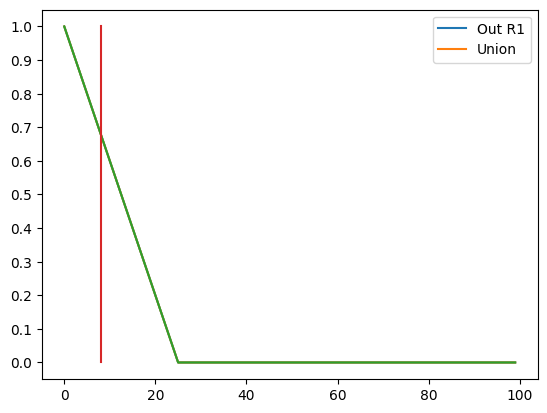

[50, 5] 37.5 ['R2']  -------->  Posición b


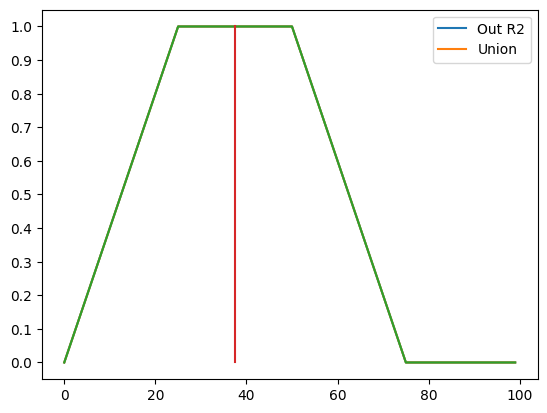

[100, 10] 91.33333333333336 ['R3']  -------->  Posición d


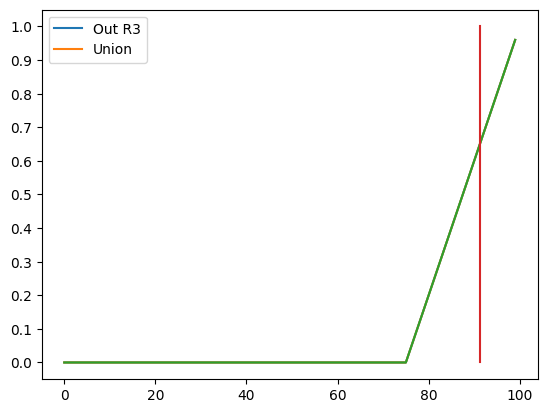

In [34]:
secuencia_entradas = [
    [0, 0], [50, 5], [100, 10]
]

# Sacamos los Fuzzy Sets
fs_a = valvulaVL.get_fuzzy_set('a')
fs_b = valvulaVL.get_fuzzy_set('b')
fs_c = valvulaVL.get_fuzzy_set('c')
fs_d = valvulaVL.get_fuzzy_set('d')

for elem in modeloMandani.model_mandani_inference(secuencia_entradas):
  member = [0, 0, 0, 0]
  member[0] = fs_a.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[1] = fs_b.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[2] = fs_c.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[3] = fs_d.membership_grade(elem['FSEnumeratedUnion'].centroide())

  val_max = max(member)

  id_return = member.index(val_max)
  if id_return == 0:
    fs_return = 'Posición a'
  if id_return == 1:
    fs_return = 'Posición b'
  if id_return == 2:
    fs_return = 'Posición c'
  if id_return == 3:
    fs_return = 'Posición d'

  print(elem['Input'], elem['FSEnumeratedUnion'].centroide(),
          elem['actives_rules'], ' --------> ', fs_return)

  # muestra la salida de los sets difuso y el centroide si procede
  dibuja_varios_CDEnumerado(ctosEnumerados=elem['EnumeratedFS'],
                              ctoUnion=elem['FSEnumeratedUnion'], mostrarUnion=True,
                              enOtraGrafica=False, muestraCentroide=True)




## 6.2 Casos complejos

<p align="justify">
 Los casos complejos que presentamos con activación de varias reglas son los siguientes:

 * **[25, 5]** -> Deberíamos recibir como salida la **posición b**. Seguimos el esquema de inferencia Mandani y comprobamos que se activa la mitad del conjunto de la posición b y la mitad del conjunto de la posición c. El centroide que nos da es de 50, de forma que comprobando su pertenencia a cada conjunto de salida nos da la posición b.
 * **[50, 2.5]** -> Deberíamos recibir como salida la **posición b**. Seguimos el esquema de inferencia y comprobamos que se activa el conjunto de la posición a completo y el de la posición b completo. Calculando el centroide obtenemos el valor de 33.49, que pertenecería a la posición b como salida final.
 * **[100, 0.5]** -> Deberíamos recibir como salida la **posición b**. Seguimos el esuqema de inferencia Mandani y comprobamos que se va a activar (aproximadamente) el 0.8 del conjunto posicion a y el 0.2 del conjunto posición b. Calculando el centroide, obtenemos un valor de 25.8, de forma que va a perteneces a la posición b.

[25, 5] 50.000000000000014 ['R2', 'R5']  -------->  Posición b


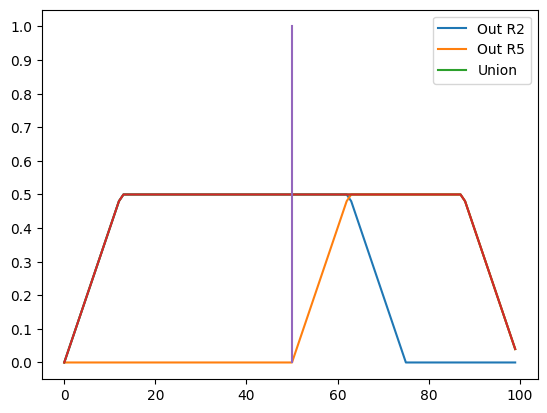

[50, 2.5] 33.491895701198025 ['R1', 'R4']  -------->  Posición b


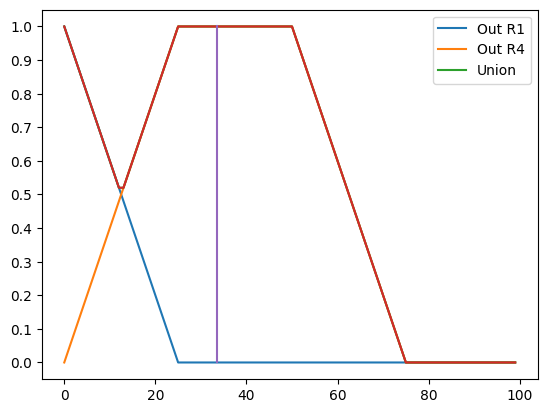

[100, 0.5] 25.812500000000046 ['R1', 'R4']  -------->  Posición b


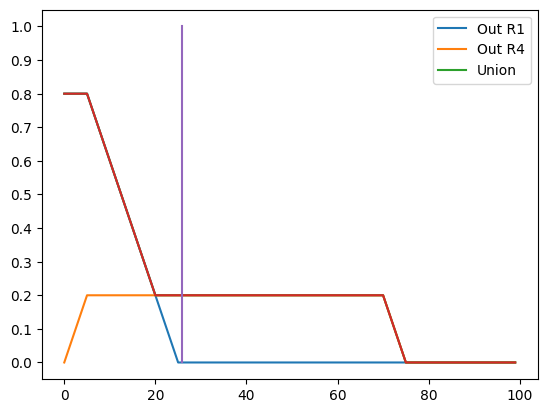

In [42]:
secuencia_entradas = [
    [25, 5], [50, 2.5], [100, 0.5]
]

# Sacamos los Fuzzy Sets
fs_a = valvulaVL.get_fuzzy_set('a')
fs_b = valvulaVL.get_fuzzy_set('b')
fs_c = valvulaVL.get_fuzzy_set('c')
fs_d = valvulaVL.get_fuzzy_set('d')

for elem in modeloMandani.model_mandani_inference(secuencia_entradas):
  member = [0, 0, 0, 0]
  member[0] = fs_a.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[1] = fs_b.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[2] = fs_c.membership_grade(elem['FSEnumeratedUnion'].centroide())
  member[3] = fs_d.membership_grade(elem['FSEnumeratedUnion'].centroide())

  val_max = max(member)

  id_return = member.index(val_max)
  if id_return == 0:
    fs_return = 'Posición a'
  if id_return == 1:
    fs_return = 'Posición b'
  if id_return == 2:
    fs_return = 'Posición c'
  if id_return == 3:
    fs_return = 'Posición d'

  print(elem['Input'], elem['FSEnumeratedUnion'].centroide(),
          elem['actives_rules'], ' --------> ', fs_return)

  # muestra la salida de los sets difuso y el centroide si procede
  dibuja_varios_CDEnumerado(ctosEnumerados=elem['EnumeratedFS'],
                              ctoUnion=elem['FSEnumeratedUnion'], mostrarUnion=True,
                              enOtraGrafica=False, muestraCentroide=True)